In [2]:
import json
import matplotlib.pyplot as plt



In [7]:
def plot_tfidf_histograms(json_file):
    # Load the JSON file
    with open(json_file, 'r') as file:
        data = json.load(file)

    # Create a figure with subplots for each category
    num_categories = len(data)
    # Calculate grid dimensions
    cols = 3  # 3 columns
    rows = (num_categories + cols - 1) // cols  # Ceiling division

    plt.figure(figsize=(20, 5 * rows))

    # Iterate through categories and create subplots
    for i, (category, category_data) in enumerate(data.items(), 1):
        # Clean up category name
        category_name = category.replace('.txt', '').replace('_', ' ').title()
        
        # Sort the data by TF-IDF value in descending order
        sorted_data = sorted(category_data, key=lambda x: x[1], reverse=True)
        
        # Extract words and their TF-IDF values
        words = [item[0] for item in sorted_data]
        tfidf_values = [item[1] for item in sorted_data]
        
        # Create subplot
        plt.subplot(rows, cols, i)
        bars = plt.bar(words, tfidf_values)
        plt.title(f'TF-IDF Values for the {category_name} Category')
        plt.xlabel('Words')
        plt.ylabel('TF-IDF Value')
        plt.xticks(rotation=90)
        plt.tight_layout()
        
        # Add labels to bars
        for bar, value in zip(bars, tfidf_values):
            plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                     f'{value:.2f}', ha='center', va='bottom', fontsize=8)
        
        # Save individual plot
        plt.figure(figsize=(10, 6))
        bars = plt.bar(words, tfidf_values)
        plt.title(f'TF-IDF Values for the {category_name} Category')
        plt.xlabel('Words')
        plt.ylabel('TF-IDF Value')
        plt.xticks(rotation=90)
        plt.tight_layout()
        
        # Add labels to bars
        for bar, value in zip(bars, tfidf_values):
            plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                     f'{value:.2f}', ha='center', va='bottom', fontsize=8)
        
        plt.savefig(f'{category_name.lower()}_tfidf_histogram.png')
        plt.close()

    # Show the combined plot
    plt.figure(figsize=(20, 5 * rows))
    for i, (category, category_data) in enumerate(data.items(), 1):
        category_name = category.replace('.txt', '').replace('_', ' ').title()
        sorted_data = sorted(category_data, key=lambda x: x[1], reverse=True)
        words = [item[0] for item in sorted_data]
        tfidf_values = [item[1] for item in sorted_data]
        
        plt.subplot(rows, cols, i)
        bars = plt.bar(words, tfidf_values)
        plt.title(f'TF-IDF Values for the {category_name} Category')
        plt.xlabel('Words')
        plt.ylabel('TF-IDF Value')
        plt.xticks(rotation=90)
        
        # Add labels to bars
        for bar, value in zip(bars, tfidf_values):
            plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                     f'{value:.2f}', ha='center', va='bottom', fontsize=8)
    
    plt.tight_layout()
    plt.show()

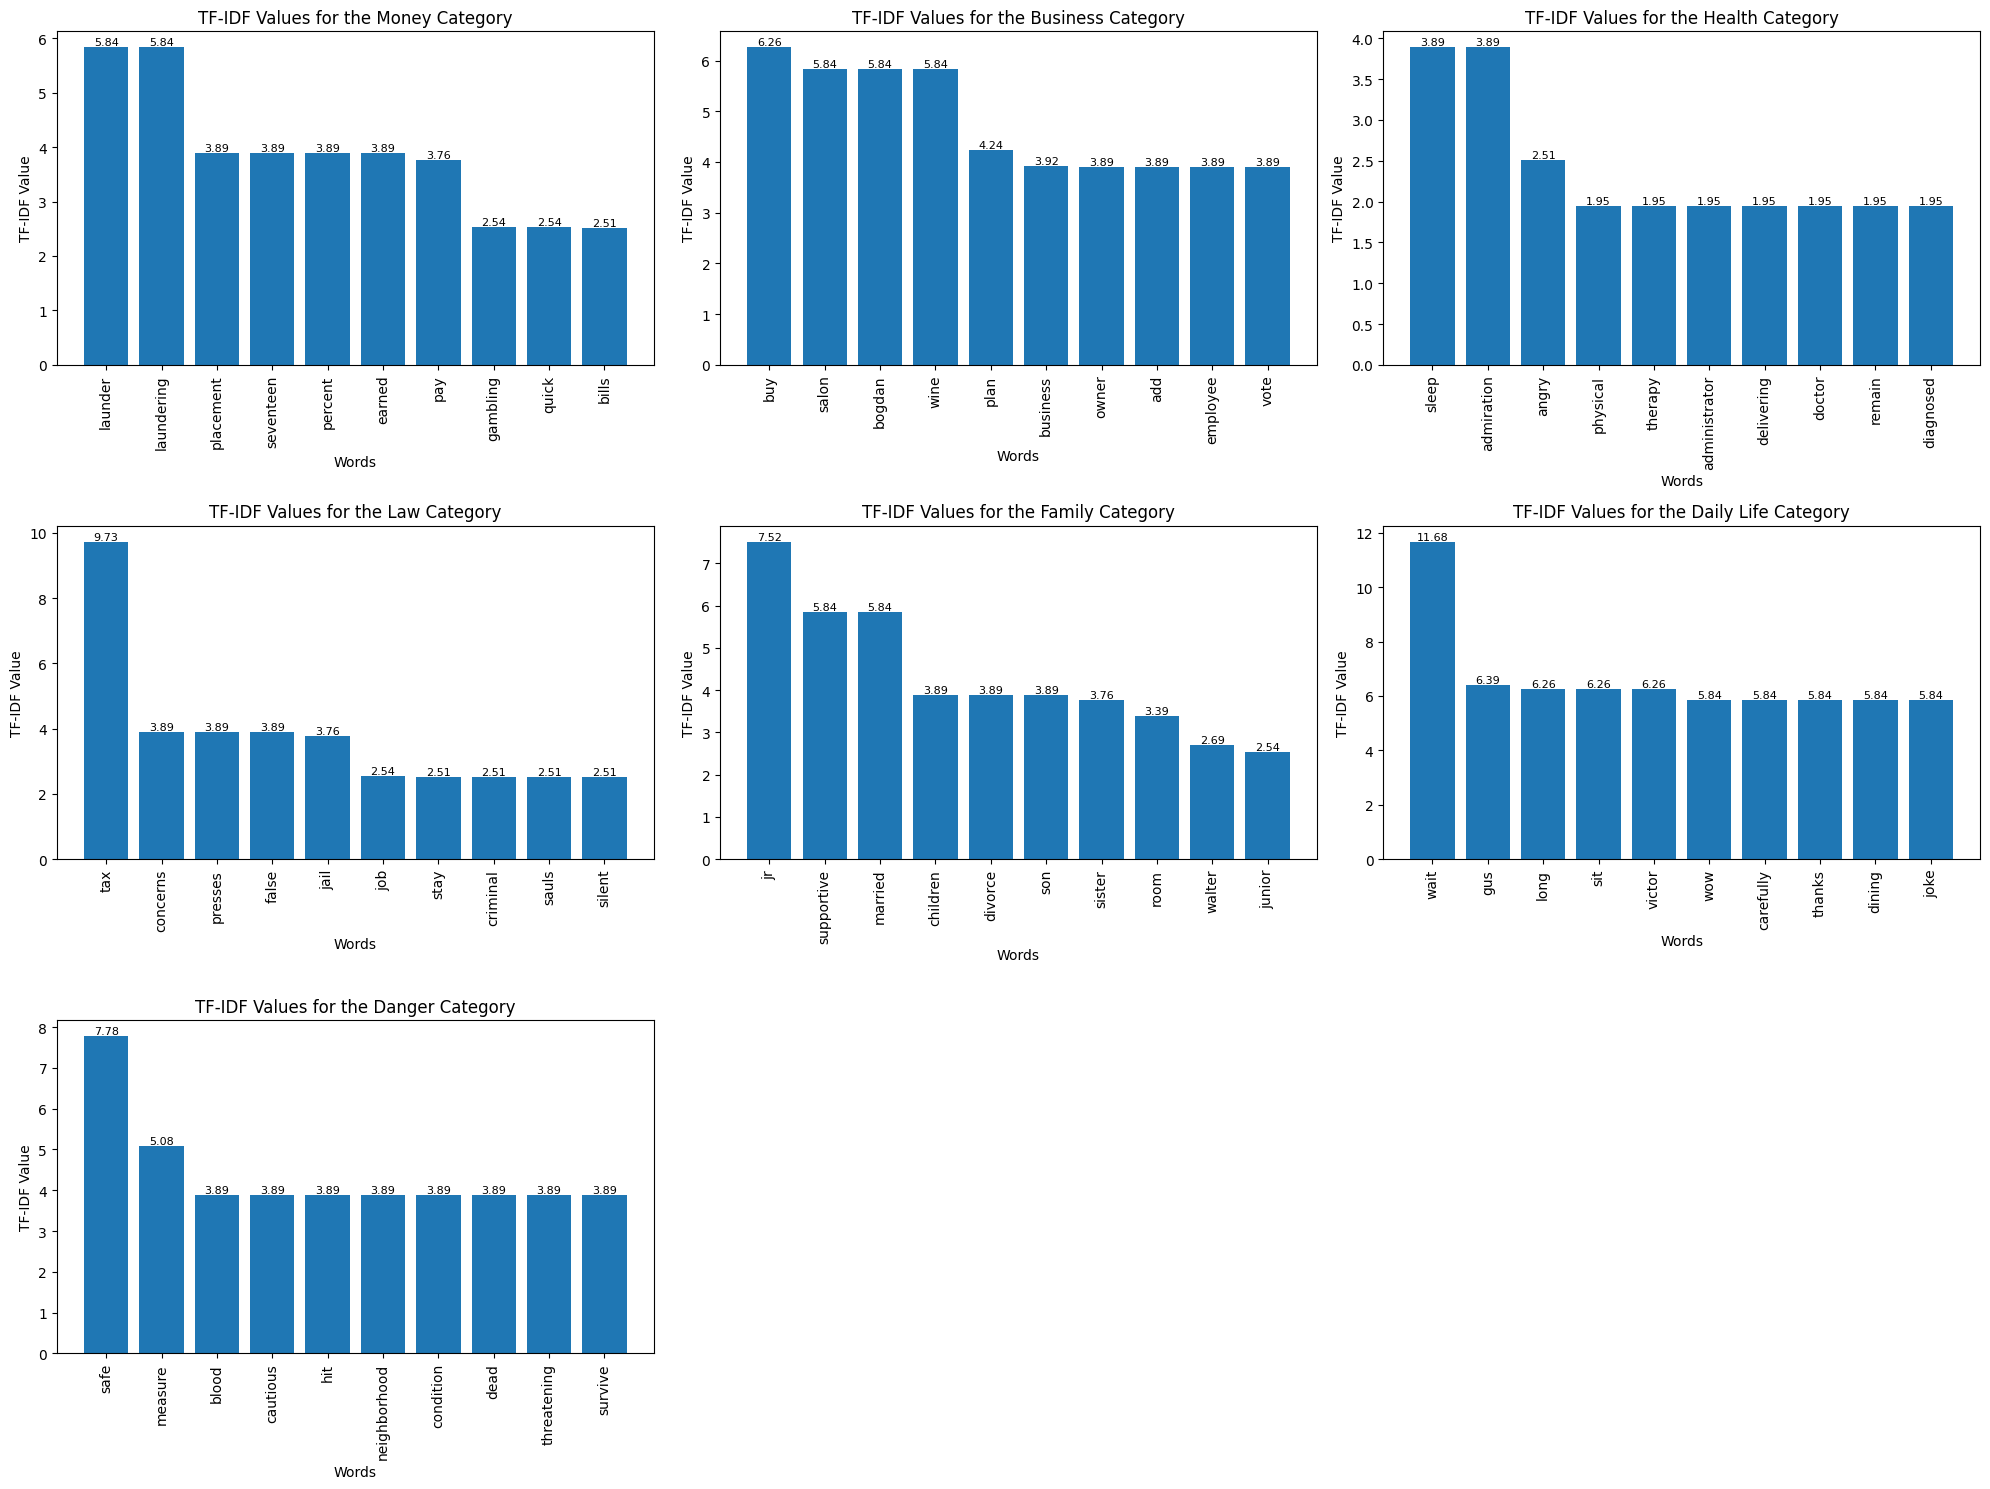

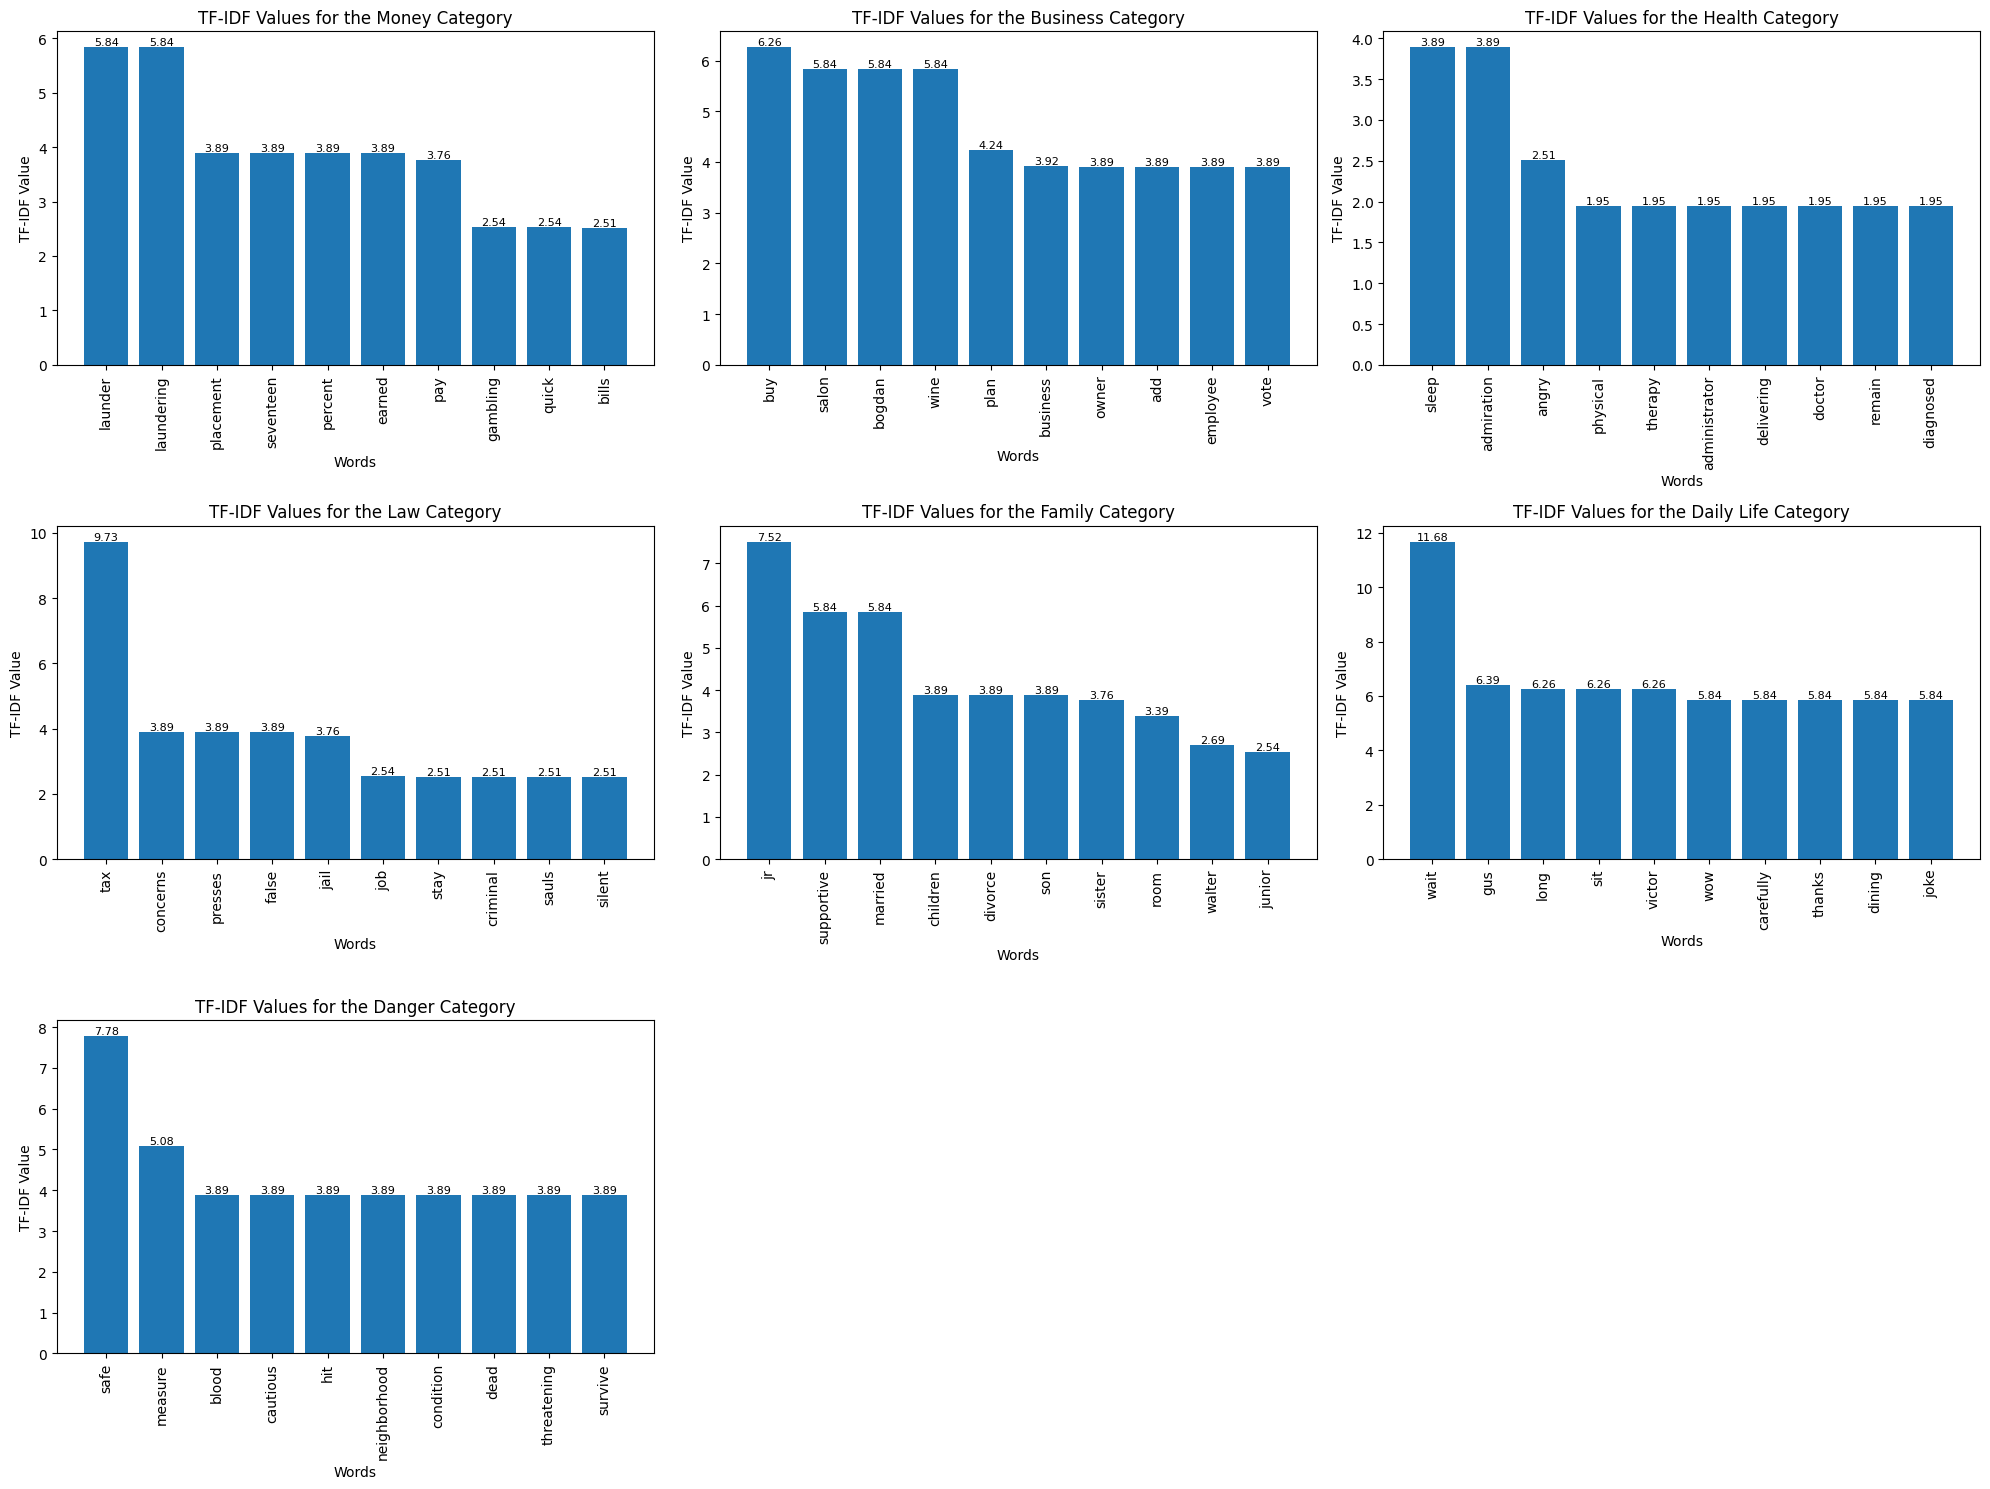

In [9]:
plot_tfidf_histograms('filtered-json.json')